<a href="https://colab.research.google.com/github/shunrei9841-sudo/Guadalupe/blob/main/Ejercicio%201%20Mazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4258886299.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_df = yf.download(tickers, start=start_date, end=end_date)['Close']
[**********************50%                       ]  2 of 4 completed

Descargando datos históricos...


[*********************100%***********************]  4 of 4 completed


Calculando el Beta...

Generando Gráfico de Precios...


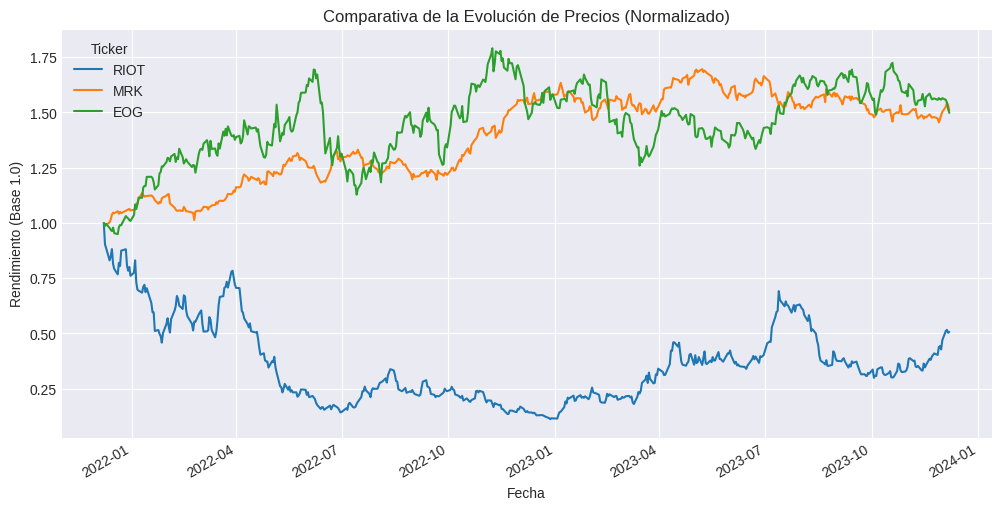

Generando Gráfico de Volatilidad (Beta)...


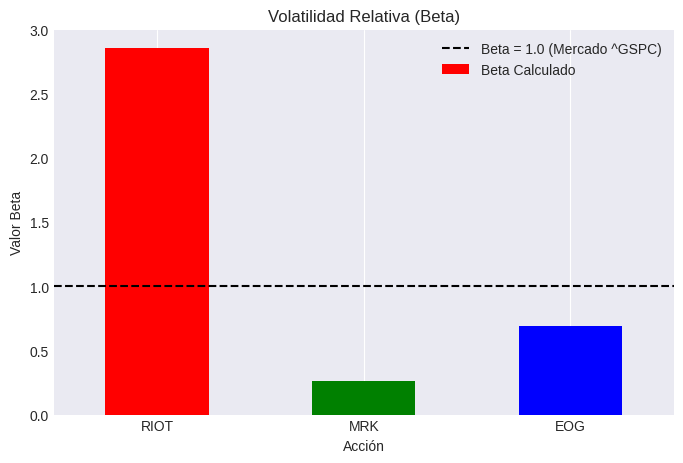


Guardando datos en Datos_Analisis_Python.xlsx...

¡Análisis Completo!
Los gráficos se han mostrado en la salida de Python.
Los datos y el Beta están guardados en el archivo: Datos_Analisis_Python.xlsx


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Necesario para la línea de referencia en el gráfico Beta
from datetime import datetime, timedelta

# --- 1. Definición de Parámetros y Descarga de Datos ---
tickers = ['RIOT', 'MRK', 'EOG', '^GSPC']
end_date = datetime(2023, 12, 8)
start_date = end_date - timedelta(days=365*2) # Datos de los últimos 2 años

print("Descargando datos históricos...")
# Usamos 'Close'
data_df = yf.download(tickers, start=start_date, end=end_date)['Close']

# --- 2. Cálculos (Retornos y Beta) ---
returns_df = data_df.pct_change().dropna()

print("Calculando el Beta...")
cov_matrix = returns_df.cov()
market_variance = returns_df['^GSPC'].var()

betas = {}
for ticker in ['RIOT', 'MRK', 'EOG']:
    beta_value = cov_matrix.loc[ticker, '^GSPC'] / market_variance
    betas[ticker] = beta_value

beta_df = pd.DataFrame(betas.items(), columns=['Acción', 'Beta Calculado'])
beta_df = beta_df.set_index('Acción')


# =======================================================
# --- 3. GENERACIÓN DE GRÁFICOS EN PYTHON (Matplotlib) ---
# =======================================================

plt.style.use('seaborn-v0_8-darkgrid')

### Gráfico 1: Comparativa de Precios de Cierre
print("\nGenerando Gráfico de Precios...")
plt.figure(figsize=(12, 6))

# Normalizar los precios para que empiecen en el mismo punto (más fácil de comparar)
normalized_prices = data_df[['RIOT', 'MRK', 'EOG']] / data_df[['RIOT', 'MRK', 'EOG']].iloc[0]

normalized_prices.plot(ax=plt.gca())

plt.title('Comparativa de la Evolución de Precios (Normalizado)')
plt.ylabel('Rendimiento (Base 1.0)')
plt.xlabel('Fecha')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()


### Gráfico 2: Gráfico de Barras de Beta
print("Generando Gráfico de Volatilidad (Beta)...")
plt.figure(figsize=(8, 5))

# Crear gráfico de barras
beta_df['Beta Calculado'].plot(kind='bar', color=['red', 'green', 'blue'])

# Agregar línea de referencia en Beta = 1.0 (el mercado)
plt.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Mercado ^GSPC)')

plt.title('Volatilidad Relativa (Beta)')
plt.ylabel('Valor Beta')
plt.xlabel('Acción')
plt.xticks(rotation=0) # Mantener etiquetas horizontales
plt.legend()
plt.grid(axis='y')
plt.show()

# =======================================================
# --- 4. EXPORTACIÓN A EXCEL (con el Beta y datos) ---
# =======================================================

# Usaremos la versión simple de pandas para la exportación de datos (sin gráficos incrustados)
# El código para gráficos incrustados en Excel es más complejo y ya lo tienes.
nombre_archivo_data = 'Datos_Analisis_Python.xlsx'
print(f"\nGuardando datos en {nombre_archivo_data}...")

with pd.ExcelWriter(nombre_archivo_data, engine='openpyxl') as writer:
    data_df.to_excel(writer, sheet_name='Precios_Cierre')
    returns_df.to_excel(writer, sheet_name='Retornos_Diarios')
    beta_df.to_excel(writer, sheet_name='Volatilidad_Beta')

print("\n¡Análisis Completo!")
print("Los gráficos se han mostrado en la salida de Python.")
print(f"Los datos y el Beta están guardados en el archivo: {nombre_archivo_data}")